In [1]:
import pandas as pd
import os
import sklearn.tree
import StringIO
import IPython.display
import pydot 

ImportError: No module named 'StringIO'

In [48]:
phonecase = pd.read_csv("../../SYD_DAT_5/data/phonecase.csv")

In [49]:
phonecase

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red
5,19,30000,Yellow
6,21,0,Yellow
7,21,20000,Yellow
8,23,30000,Yellow
9,25,40000,Pink


In [50]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=1)

In [51]:
classifier.fit(phonecase[['Age','Income']], phonecase[['Colour']])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [52]:
classifier.predict(phonecase[['Age','Income']])

array(['Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow',
       'Yellow', 'Yellow', 'Yellow', 'Pink', 'Pink', 'Pink', 'Pink',
       'Pink', 'Pink', 'Pink', 'Pink', 'Pink'], dtype=object)

In [53]:
classifier.feature_importances_

array([ 1.,  0.])

In [54]:
file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(classifier, out_file=file_obj)

In [55]:
# try use pydot2 if you get a problem
graph = pydot.graph_from_dot_data(file_obj.getvalue())

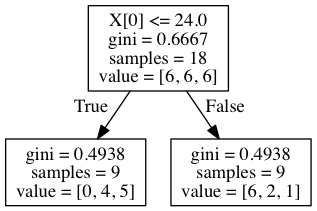

In [56]:
IPython.display.Image(graph.create_png())

In [60]:
# here is the graphviz format
print(file_obj.getvalue())

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 24.0\ngini = 0.6667\nsamples = 18\nvalue = [6, 6, 6]"] ;
1 [label="gini = 0.4938\nsamples = 9\nvalue = [0, 4, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.4938\nsamples = 9\nvalue = [6, 2, 1]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


In [76]:
# using more levels
deeper_classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [77]:
deeper_classifier.fit(phonecase[['Age','Income']], phonecase[['Colour']])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [78]:
deeper_file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(deeper_classifier, out_file=deeper_file_obj)
deeper_graph = pydot.graph_from_dot_data(deeper_file_obj.getvalue())

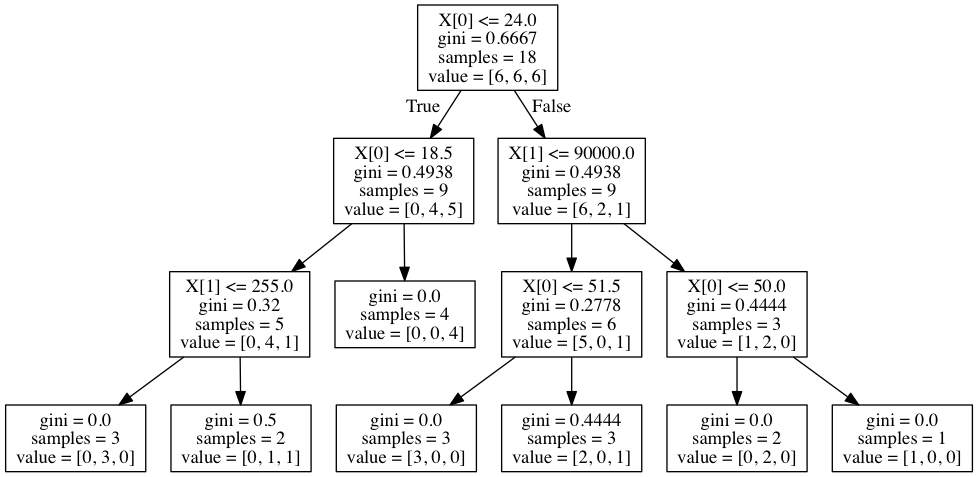

In [79]:
IPython.display.Image(deeper_graph.create_png())

In [112]:
# using entropy classifier
entropy_classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
entropy_classifier.fit(phonecase[['Age','Income']], phonecase[['Colour']])
entropy_file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(entropy_classifier, out_file=entropy_file_obj)
entropy_graph = pydot.graph_from_dot_data(entropy_file_obj.getvalue())

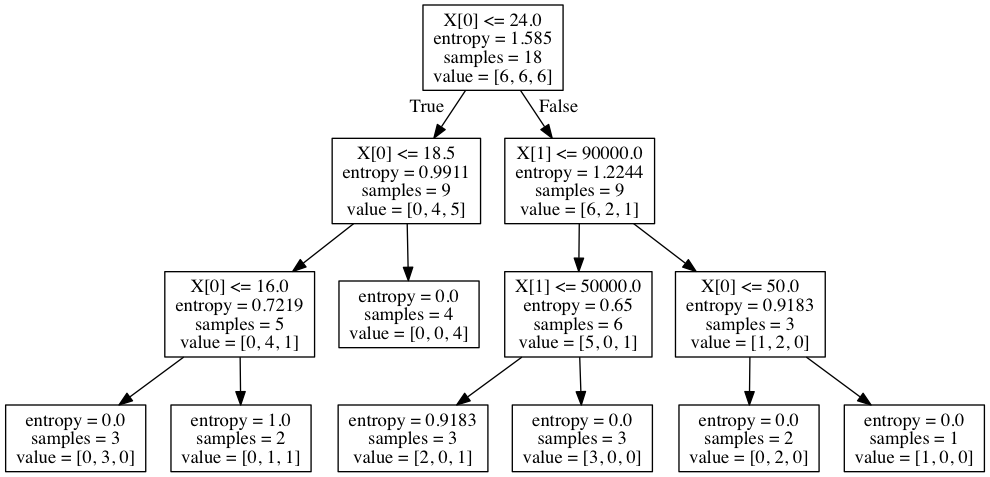

In [113]:
IPython.display.Image(entropy_graph.create_png())

In [114]:
entropy_classifier.feature_importances_

array([ 0.76824793,  0.23175207])